# まずは PCA のテスト

(150, 4)
(150, 2)
各次元の寄与率: [ 0.92461621  0.05301557]
累積寄与率: 0.9776317750248034


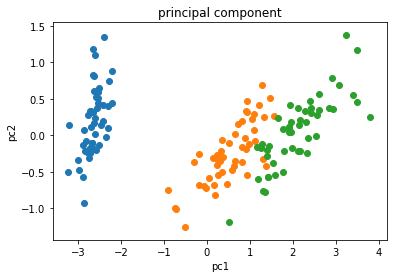

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

iris = datasets.load_iris()

print(iris.data.shape)
#print(iris.target)

# 主成分分析する
pca = PCA(n_components=2)
pca.fit(iris.data)

transformed = pca.fit_transform(iris.data)
#print(iris.data)
#print(transformed)
print(transformed.shape)

# 主成分をプロットする
for label in np.unique(iris.target):
    plt.scatter(transformed[iris.target == label, 0],
                transformed[iris.target == label, 1])

plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# 主成分の寄与率を出力する
print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))

# グラフを表示する
plt.show()

In [ ]:
# AutoEncoder で抽出した特徴ベクトルを PCA にかける

データセットの数: 1000, 特徴量の次元: 300
100までの累積寄与率: 0.9640087764128111


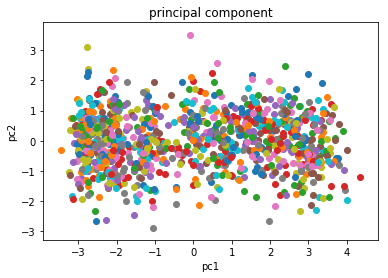

In [70]:
import pickle

n = 100

with open('vector.pkl', 'rb') as f:
    vectors = pickle.load(f)
    
#print(vectors)
print('データセットの数: {}, 特徴量の次元: {}'.\
      format(vectors.shape[0], vectors.shape[1]))

# 主成分分析する
pca = PCA(n_components=n)
pca.fit(vectors)

pca_vectors = pca.fit_transform(vectors)

# 主成分をプロットする
offset = 10

for v in pca_vectors:
    plt.scatter(v[0], v[offset+1])
    
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# 主成分の寄与率を出力する
#print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('{0}までの累積寄与率: {1}'.\
      format(n, sum(pca.explained_variance_ratio_)))

# グラフを表示する
plt.show()